In this example, I will use the k-Nearest Neighbors (k-NN) algorithm to sort data. KNN is a machine learning method that relies on proximity between data to make predictions or classifications.

The **Digit Recognizer** dataframe is a dataset widely used in the field of computer vision and machine learning. It consists of a collection of handwritten digit images, where each image is represented as a matrix of pixels. Each pixel contains a value that indicates the gray intensity corresponding to that point in the image.

This dataset is often used for image classification tasks, where the goal is to train machine learning algorithms to correctly recognize handwritten digits. Each image is associated with a label that indicates the numerical value of the digit represented in the image. Based on this data, machine learning models can learn to extract relevant features from images and perform correct digit classification.

In [1]:
# Loading the packages

# Manipulation
import numpy as np
import pandas as pd

# Machine Learning
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Visualizing
import matplotlib.pyplot as plt
import seaborn as sns

# Ignoring warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the training data
df_train = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')

In [3]:
# Visualizing the data
df_train.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


> Each row of the df_train represents a image, where in variable **label** represent a class and de columns from **pixel0** to **pixel783** represent the values of pixels' image.

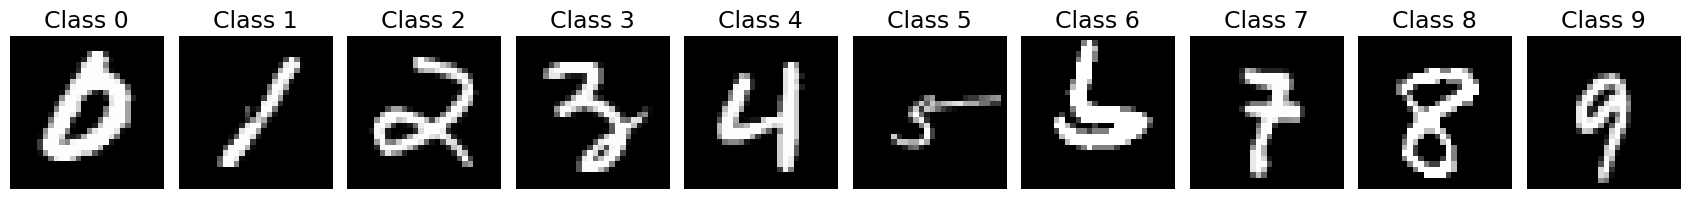

In [4]:
df_sorted = df_train.sort_values('label')

unique_categories = df_sorted['label'].unique()

fig, axes = plt.subplots(1, len(unique_categories), figsize=(17, 4))

for i, category in enumerate(unique_categories):
    image = df_sorted[df_sorted['label'] == category].iloc[0, 1:].values.reshape(28, 28)
    axes[i].imshow(image, cmap='gray')
    axes[i].set_title(f'Class {category}', fontsize=17)
    axes[i].axis('off')

plt.tight_layout()
plt.show()

> Here's a image of each class.

In [5]:
# Checking for missing values in each column
columns_with_nulls = df_train.columns[df_train.isnull().any()].tolist()

# Displaying columns that have missing values
if len(columns_with_nulls) > 0:
    print("There are missing values:")
    for columns in columns_with_nulls:
        print(columns)
else:
    print("There are no missing values")

There are no missing values


> This is a positive information because it means that the dataframe there's no missing values. In this case, the absence of missing values simplify the processe and the analyse of datas thereby is not necessary deal with missign values using technics of imputation ou exclusion of rows with missing values.

In [6]:
# Splitting dataframe
X = df_train.iloc[:, 1:]
target = df_train.label

# Shape of dataframe
print(f"Shape of X: {X.shape}\nShape of target: {target.shape}")

Shape of X: (42000, 784)
Shape of target: (42000,)


> We have the variable **X** with a total of 42.000 rows and 784 columns. As for the variable **y**, we have 42.000 classes in the variable target.

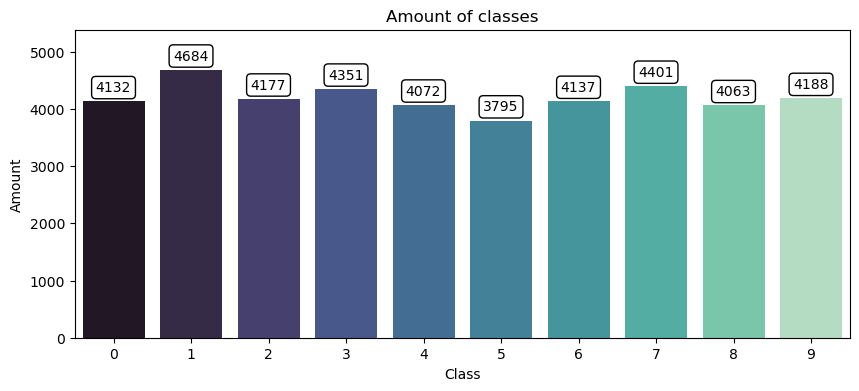

In [7]:
# Visualizing amoung of classes

# Ploting the countplot
plt.figure(figsize=(10, 4))
ax = sns.countplot(x=target, palette='mako')

# adding the amoung in each bars
for p in ax.patches:
    ax.annotate(str(int(p.get_height())), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                bbox=dict(facecolor='white', 
                          edgecolor='black', 
                          boxstyle='round'))

# Setting of the limit in axis y
plt.ylim(0, max([p.get_height() for p in ax.patches]) * 1.15)

# Setting the font size for all elements
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Class', fontsize=10)
plt.ylabel('Amount', fontsize=10)
plt.title('Amount of classes', fontsize=12)

plt.show()


>Regarding of amount of each digit, is notable that there's not much a difference amount between each class. This indicate that the dataframe is relatively equilibrate in terms of representation of each digit. To have a similiar amount of ocorrences in each class is desireable in many problems of classification.
>
> With a amount almost equal of ocorrence between the classes, it's expected a model of recognition model that can to learn and generalize right to all classes,
>
> With an almost equal amount of occurrences between categories in the Digit Recognizer database, it is expected that a digit recognition model can learn and generalize well to all categories, without a tendency to misclassify one category over others.


## Pre-processing

In [8]:
X = X.values


In [9]:
target = target.values

In [10]:
# Splitting the data into training data and test data.
X_train, X_test, y_train, y_test = train_test_split(X, target, 
                                                    test_size=0.3)

> This split is essential to evaluate the capacity of generalization of model, ensure that it to be able to make predictions precision with new datas.
>
> For the teste datas I will extract 30%.


### Verifying the best values of K

In [11]:
# Creating a range of values of k that will be tested
kVals = range(1, 15, 2)

# Creating a empty list to get the accuracies
accuracies = []

# Loop in all of values of k to test each one of them
for k in kVals:
    
    # Training the model KNN with each values of k
    modelKNN = KNeighborsClassifier(n_neighbors = k)
    modelKNN.fit(X_train, y_train)
          
    # Evaluating the model and updating the precision list
    score = modelKNN.score(X_test, y_test)
    print("With the value k = %d, the accuracy is = %.2f%%" % (k, score * 100))
    accuracies.append(score)

With the value k = 1, the accuracy is = 96.78%
With the value k = 3, the accuracy is = 96.61%
With the value k = 5, the accuracy is = 96.60%
With the value k = 7, the accuracy is = 96.54%
With the value k = 9, the accuracy is = 96.29%
With the value k = 11, the accuracy is = 96.17%
With the value k = 13, the accuracy is = 95.96%


> In short, this code runs a loop that iterates over different values of k, trains a KNN model for each value of k, evaluates the model, and stores the accuracies in a list. This allows comparing the performance of the KNN model with different values of k and identifying which value provides the highest accuracy.

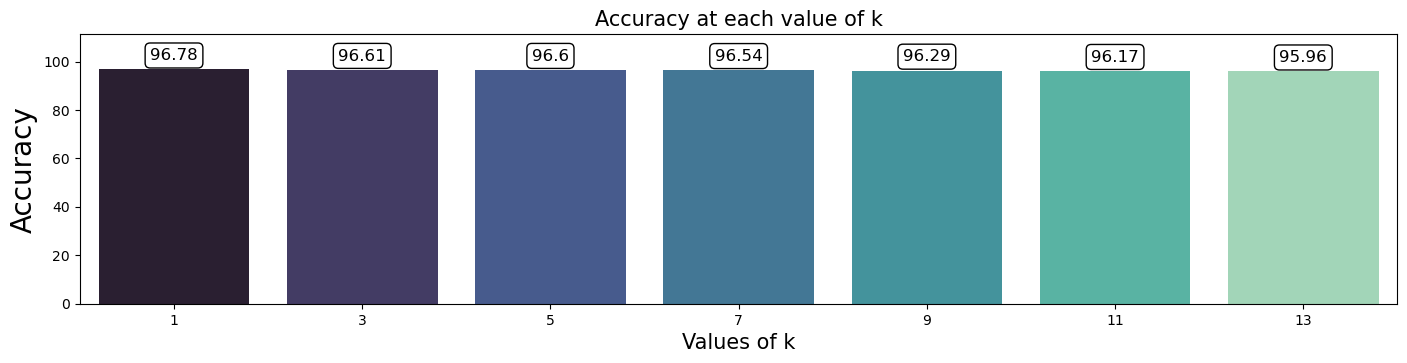

In [12]:
# Creating a DataFrame with k and score values
percentage_accuracy = [round(score * 100, 2) for score in accuracies[:15]]
ranking = pd.DataFrame({'k': kVals, 'score': percentage_accuracy[:15]})

# Defining the order of the values of k
ranking_k = ranking.sort_values(by='score', ascending= False)['k'].tolist()

# Plotting the bar chart
plt.figure(figsize=(17, 3.5))
ax = sns.barplot(x='k', y='score', data=ranking, order=ranking_k, palette='mako')

# Adding labels with values
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points',
                bbox=dict(facecolor='white', edgecolor='black', boxstyle='round'), fontsize = 12)

# Adjusting the y-axis limits
plt.ylim(0, max([p.get_height() for p in ax.patches]) * 1.15)  

# # Setting the font size for all elements
plt.title('Accuracy at each value of k', fontsize=15)
plt.xlabel('Values of k', fontsize=15)
plt.ylabel('Accuracy', fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Showing chart
plt.show()

In [13]:
# Find the best value of k with the highest score
best_k = kVals[np.argmax(accuracies)]
best_score = np.max(accuracies)

print("The best value of k is %d with an accuracy of %.2f%%" % (best_k, best_score * 100))

The best value of k is 1 with an accuracy of 96.78%


In [14]:
# Creating the final version of the model
finalModel = KNeighborsClassifier(n_neighbors= best_k, 
                                     metric =  'euclidean', 
                                     weights= 'distance')

> The final KNN model is configured to use the Euclidean distance metric and consider the best value k nearest neighbors with weights based on distance.

In [15]:
# Training the final model
finalModel.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=1, weights='distance')

In [16]:
# making predictions
predictions = finalModel.predict(X_test)

In [17]:
# Model performance
print("Model Evaluation on Test Data")
print(classification_report(y_test, predictions, digits=4))

Model Evaluation on Test Data
              precision    recall  f1-score   support

           0     0.9786    0.9925    0.9855      1199
           1     0.9713    0.9909    0.9810      1433
           2     0.9834    0.9643    0.9737      1287
           3     0.9539    0.9632    0.9585      1332
           4     0.9747    0.9614    0.9680      1242
           5     0.9589    0.9496    0.9542      1130
           6     0.9703    0.9869    0.9785      1223
           7     0.9629    0.9680    0.9654      1313
           8     0.9846    0.9337    0.9585      1236
           9     0.9401    0.9635    0.9516      1205

    accuracy                         0.9678     12600
   macro avg     0.9679    0.9674    0.9675     12600
weighted avg     0.9680    0.9678    0.9677     12600



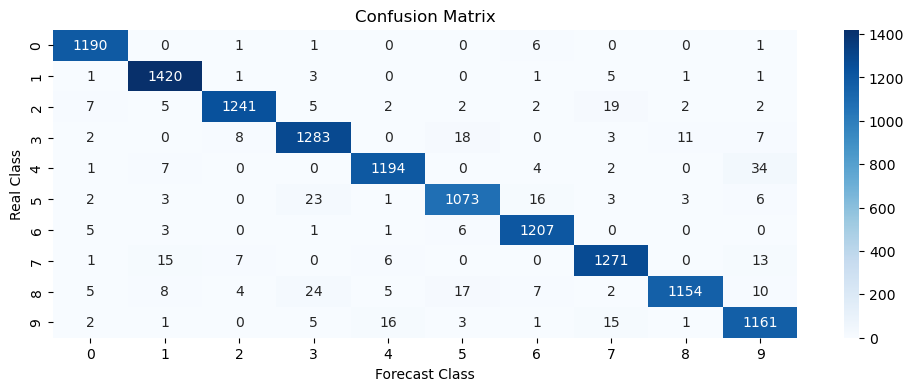

In [18]:
# Getting the predictions from the model
predictions = finalModel.predict(X_test)

# Creating the confusion matrix
cm = confusion_matrix(y_test, predictions)

# Plotting the confusion matrix
plt.figure(figsize=(12, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Forecast Class")
plt.ylabel("Real Class")
plt.show()

In [19]:
# Confusion matrix
cm = confusion_matrix(y_test, predictions)

# Calculating total errors by category
errors_per_category = cm.sum(axis=1) - np.diag(cm)

# Getting errors from each class
most_errors_categories = np.argsort(errors_per_category)[::-1]

# Printing the erros
print("The categories in which the model made the most erros:")
for category in most_errors_categories:
    print("Class {}: Errors = {}".format(category, errors_per_category[category]))


The categories in which the model made the most erros:
Class 8: Errors = 82
Class 5: Errors = 57
Class 3: Errors = 49
Class 4: Errors = 48
Class 2: Errors = 46
Class 9: Errors = 44
Class 7: Errors = 42
Class 6: Errors = 16
Class 1: Errors = 13
Class 0: Errors = 9


## Viewing some classes that the model failed

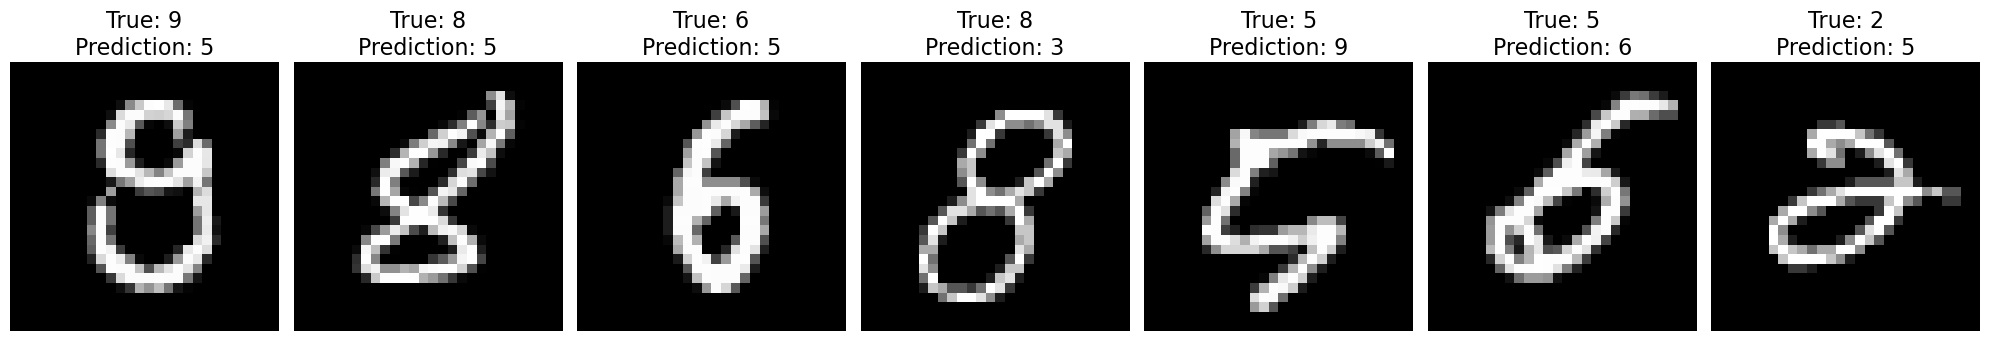

In [20]:
# Get the indexes of the wrong predictions
wrong_indices = np.where(y_test != predictions)[0]

# Randomly select 7 samples
random_indices = np.random.choice(wrong_indices, 7, replace=False)
random_samples = X_test[random_indices]
random_true_labels = y_test[random_indices]
random_predicted_labels = predictions[random_indices]

# Plotting the 7 samples
fig, axes = plt.subplots(1, 7, figsize=(20, 4))

for i, ax in enumerate(axes):
    image = random_samples[i]
    true_label = random_true_labels[i]
    predicted_label = random_predicted_labels[i]
    
    pixels = image.reshape((28, 28))
    
    ax.imshow(pixels, cmap='gray')
    ax.set_title(f"True: {true_label}\nPrediction: {predicted_label}", fontsize = 16)
    ax.axis('off')

plt.tight_layout()
plt.show()


> Here are some example instances of the error model.

## Visualizing some classes that the model got right

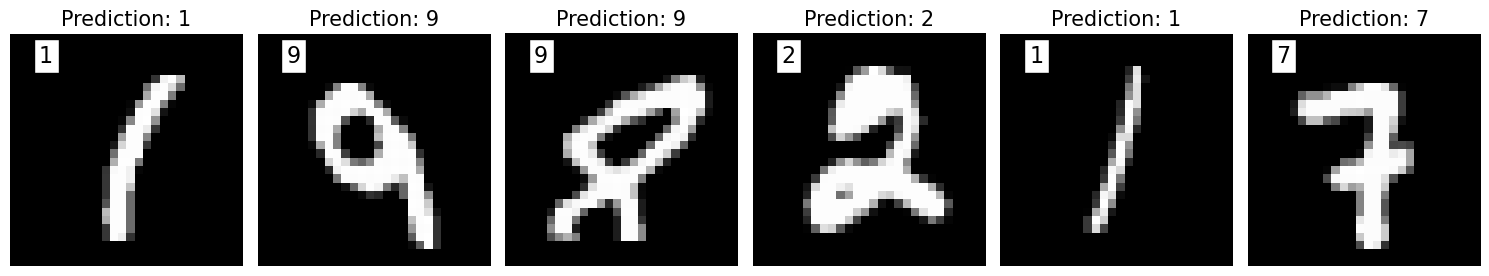

In [21]:
fig, axes = plt.subplots(1, 6, figsize=(15, 3))

for i, ax in enumerate(axes):
    # Getting an image and making the prediction
    image = X_test[i]
    prediction = finalModel.predict([image])[0]
    
    # showing the predictions
    imgdata = np.array(image)
    pixels = imgdata.reshape((28, 28))
    
    ax.imshow(pixels, cmap='gray')
    ax.annotate(prediction, (3, 3), bbox={'facecolor': 'white'}, fontsize=16)
    ax.set_title("Prediction: {}".format(prediction), fontsize = 15)
    ax.axis('off')

# Adjusting spaces between subplots
plt.tight_layout()

# Displaying the figure
plt.show()

## Performing predictions using the model trained with data from the test.csv file

In [22]:
# Loading the data
df_teste = pd.read_csv('/kaggle/input/digit-recognizer/test.csv').values

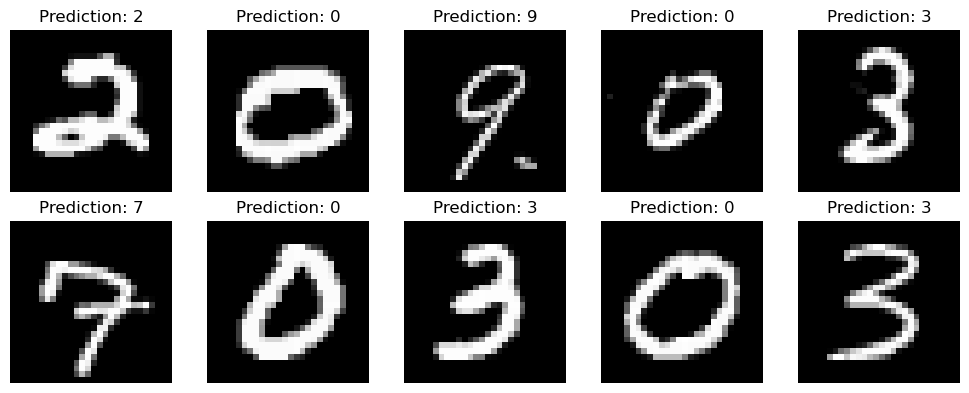

In [23]:
# Making predictions with the trained model using test data
indices = np.random.randint(0, high=len(df_teste), size=(10,))

# Creating a figure with subplots
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(10, 4))

# Iterating over the subplots and displaying the images
for i, ax in enumerate(axes.flatten()):
    
  # Getting an image and making the prediction
    image = df_teste[i]
    prediction = finalModel.predict([image])[0]

    # Showing the image and the preview
    imgdata = np.array(image, dtype='float')
    pixels = imgdata.reshape((28, 28))
    ax.imshow(pixels, cmap='gray')
    ax.set_title("Prediction: {}".format(prediction))
    ax.axis('off')

# Adjusting spaces between subplots
plt.tight_layout()

# Displaying the figure
plt.show()